<a href="https://colab.research.google.com/github/ridwanmahendra/AStarBucharestMKA/blob/main/PKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import queue
import matplotlib.pyplot as plt

Memisahkan string menjadi substring. Menjadikan value dari heuristics.txt menjadi bentuk dict.

In [64]:
import json
heuristics = {}
f = open("heuristics.txt")
for i in f.readlines():
    node_heuristic_val = i.split()
    heuristics[node_heuristic_val[0]] = int(node_heuristic_val[1])
# print(heuristics)
print(json.dumps(heuristics, indent=1))

{
 "Arad": 366,
 "Bucharest": 0,
 "Craiova": 160,
 "Dobreta": 242,
 "Eforie": 161,
 "Fagaras": 178,
 "Giurgiu": 77,
 "Hirsova": 151,
 "Iasi": 226,
 "Lugoj": 244,
 "Mehadia": 241,
 "Neamt": 234,
 "Oradea": 380,
 "Pitesti": 98,
 "Rimnicu_Vilcea": 193,
 "Sibiu": 253,
 "Timisoara": 329,
 "Urziceni": 80,
 "Vaslui": 199,
 "Zerind": 374
}


Split pada citiesGraph.txt, untuk membuat dict graph terhadap masing-masing city

In [59]:
graph = {}
file = open("citiesGraph.txt")
for i in file.readlines():
  node_val = i.split()

  if node_val[0] in graph and node_val[1] in graph:
    c = graph.get(node_val[0])
    c.append([node_val[1], node_val[2]])
    graph.update({node_val[0]: c})

    c = graph.get(node_val[1])
    c.append([node_val[0], node_val[2]])
    graph.update({node_val[1]: c})

  elif node_val[0] in graph:
    c = graph.get(node_val[0])
    c.append([node_val[1], node_val[2]])
    graph.update({node_val[0]: c})

    graph[node_val[1]] = [[node_val[0], node_val[2]]]

  elif node_val[1] in graph:
    c = graph.get(node_val[1])
    c.append([node_val[0], node_val[2]])
    graph.update({node_val[1]: c})

    graph[node_val[0]] = [[node_val[1], node_val[2]]]

  else:
    graph[node_val[0]] = [[node_val[1], node_val[2]]]
    graph[node_val[1]] = [[node_val[0], node_val[2]]]
print(graph)
# print(json.dumps(graph))

{'Arad': [['Sibiu', '140'], ['Timisoara', '118'], ['Zerind', '75']], 'Sibiu': [['Arad', '140'], ['Fagaras', '99'], ['Oradea', '151'], ['Rimnicu_Vilcea', '80']], 'Timisoara': [['Arad', '118'], ['Lugoj', '111']], 'Zerind': [['Arad', '75'], ['Oradea', '71']], 'Bucharest': [['Fagaras', '211'], ['Giurgiu', '90'], ['Pitesti', '101'], ['Urziceni', '85']], 'Fagaras': [['Bucharest', '211'], ['Sibiu', '99']], 'Giurgiu': [['Bucharest', '90']], 'Pitesti': [['Bucharest', '101'], ['Craiova', '138'], ['Rimnicu_Vilcea', '97']], 'Urziceni': [['Bucharest', '85'], ['Hirsova', '98'], ['Vaslui', '142']], 'Craiova': [['Dobreta', '120'], ['Pitesti', '138'], ['Rimnicu_Vilcea', '146']], 'Dobreta': [['Craiova', '120'], ['Mehadia', '75']], 'Rimnicu_Vilcea': [['Craiova', '146'], ['Pitesti', '97'], ['Sibiu', '80']], 'Mehadia': [['Dobreta', '75'], ['Lugoj', '70']], 'Eforie': [['Hirsova', '86']], 'Hirsova': [['Eforie', '86'], ['Urziceni', '98']], 'Iasi': [['Neamt', '87'], ['Vaslui', '92']], 'Neamt': [['Iasi', '87']]

mendefinisikan titik kordinat (plot) masing masing kota. yang diambil pada dari hasil split cities.txt

In [60]:
city = {}
citiesCode = {}
f = open("cities.txt")
j = 1
for i in f.readlines():
  node_city_val = i.split()
  city[node_city_val[0]] = [int(node_city_val[1]), int(node_city_val[2])]

  citiesCode[j] = node_city_val[0]
  j += 1

print(city)
print(citiesCode)

{'Arad': [29, 192], 'Bucharest': [268, 55], 'Craiova': [163, 22], 'Dobreta': [91, 32], 'Eforie': [420, 28], 'Fagaras': [208, 157], 'Giurgiu': [264, 8], 'Hirsova': [396, 74], 'Iasi': [347, 204], 'Lugoj': [91, 98], 'Mehadia': [93, 65], 'Neamt': [290, 229], 'Oradea': [62, 258], 'Pitesti': [220, 88], 'Rimnicu_Vilcea': [147, 124], 'Sibiu': [126, 164], 'Timisoara': [32, 124], 'Urziceni': [333, 74], 'Vaslui': [376, 153], 'Zerind': [44, 225]}
{1: 'Arad', 2: 'Bucharest', 3: 'Craiova', 4: 'Dobreta', 5: 'Eforie', 6: 'Fagaras', 7: 'Giurgiu', 8: 'Hirsova', 9: 'Iasi', 10: 'Lugoj', 11: 'Mehadia', 12: 'Neamt', 13: 'Oradea', 14: 'Pitesti', 15: 'Rimnicu_Vilcea', 16: 'Sibiu', 17: 'Timisoara', 18: 'Urziceni', 19: 'Vaslui', 20: 'Zerind'}


visualisasi koneksi antar kota

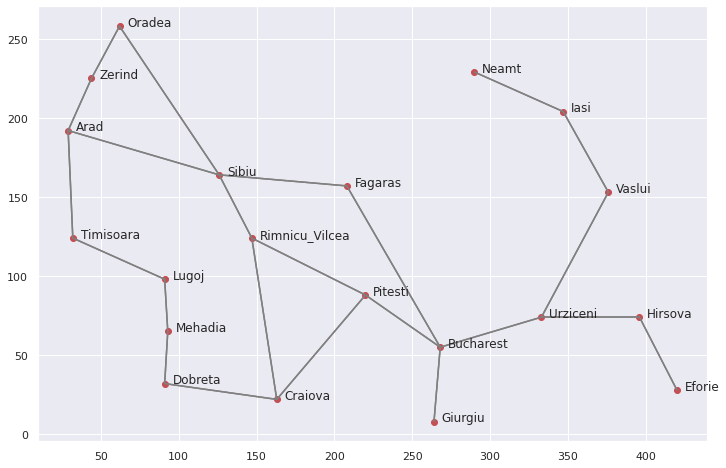

In [61]:
for i, j in city.items():
    plt.plot(j[0], j[1], "ro")
    plt.annotate(i, (j[0] + 5, j[1]))

    for k in graph[i]:
        n = city[k[0]]
        plt.plot([j[0], n[0]], [j[1], n[1]], "gray")

In [62]:
for i, j in citiesCode.items():
  print(i, j)

1 Arad
2 Bucharest
3 Craiova
4 Dobreta
5 Eforie
6 Fagaras
7 Giurgiu
8 Hirsova
9 Iasi
10 Lugoj
11 Mehadia
12 Neamt
13 Oradea
14 Pitesti
15 Rimnicu_Vilcea
16 Sibiu
17 Timisoara
18 Urziceni
19 Vaslui
20 Zerind


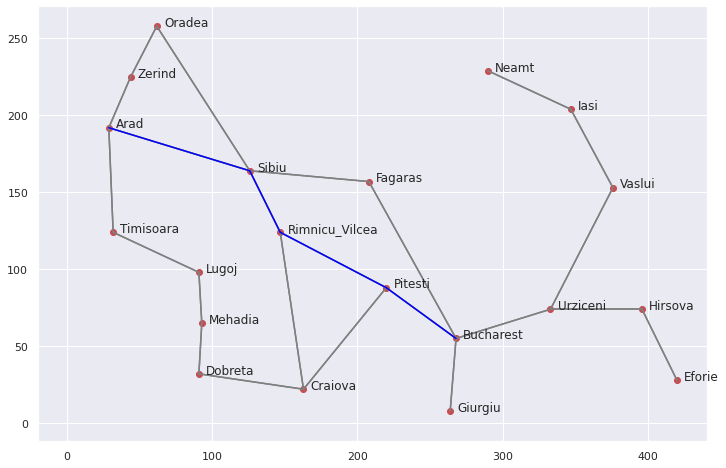

In [63]:
inputCode = int(1)
cityName = citiesCode[inputCode]
goalNode = "Bucharest"
priorityQueue = queue.PriorityQueue()
distance = 0
path = []

priorityQueue.put((heuristics[cityName] + distance, [cityName, 0]))
while priorityQueue.empty() == False:
  current = priorityQueue.get()[1]
  path.append(current[0])
  distance += int(current[1])
  
  if current[0] == goalNode:
    break
  priorityQueue = queue.PriorityQueue()

  for i in graph[current[0]]:
    if i[0] not in path:
      priorityQueue.put((heuristics[i[0]] + int(i[1]) + distance, i))

for i, j in city.items():
    plt.plot(j[0], j[1], "ro")
    plt.annotate(i, (j[0] + 5, j[1]))
    
    for k in graph[i]:
      n = city[k[0]]
      plt.plot([j[0], n[0]], [j[1], n[1]], "gray")

for i in range(len(path)):
  try:
    first = city[path[i]]
    secend = city[path[i + 1]]
    plt.plot([first[0], secend[0]], [first[1], secend[1]], "blue")
  except:
    continue
plt.errorbar(1, 1, label="ASTAR", color="blue")
plt.show()

